In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, learning_curve

In [9]:
df = pd.read_csv('S3DS.csv')
#Slice dataframe for predictive model
X = df[['Universal health coverage (UHC) service coverage index', 'Health worker density, by type of occupation (per 10,000 population)::PHYSICIAN']].values
y = df['Mortality rate attributed to cardiovascular disease, cancer, diabetes or chronic respiratory disease (probability):::BOTHSEX'].values
#Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
neighbour_for_test = neighbors.KNeighborsRegressor(n_neighbors = 4).fit(X_train, y_train)

In [10]:
#Create sample data for sample prediction
sample = [92, 27.845]
sample_prediction = neighbour_for_test.predict([sample])
print('-----Sample test case-----')
print('Universal health coverage: ', sample[0])
print('Physician density: ', sample[1])
print('Predicted mortality rate: ', int(sample_prediction))
print('--------------------------')

-----Sample test case-----
Universal health coverage:  92
Physician density:  27.845
Predicted mortality rate:  9
--------------------------


In [11]:
#Actual predictions
y_prediction = neighbour_for_test.predict(X_test)
mean_square_error = metrics.mean_squared_error(y_test, y_prediction)
print("RMSE: ", sqrt(mean_square_error))
#An r-squared score of 1 means points in the scatterplot are very close to the regression line
print("R-squared score: ", metrics.r2_score(y_test, y_prediction))

RMSE:  5.371290122098933
R-squared score:  0.5264804759418702


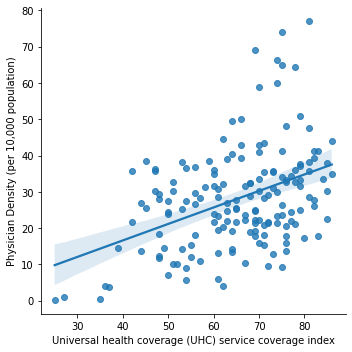

In [12]:
universal_health_coverage = "Universal health coverage (UHC) service coverage index"
physician_density = "Health worker density, by type of occupation (per 10,000 population)::PHYSICIAN"

ax = sns.lmplot(x = universal_health_coverage, y = physician_density, data = df)
ax.set(xlabel = "Universal health coverage (UHC) service coverage index", ylabel = "Physician Density (per 10,000 population)")
plt.show()

Given the intense scattering of the points in the scatterplot, it is safe to assume that the r-squared score of around 0.53 makes sense, as there are not that many points close to the regression line. An r-squared score of one/near one indicates a more compact scatterplot where all the points are near the regression line. Example is provided below. 

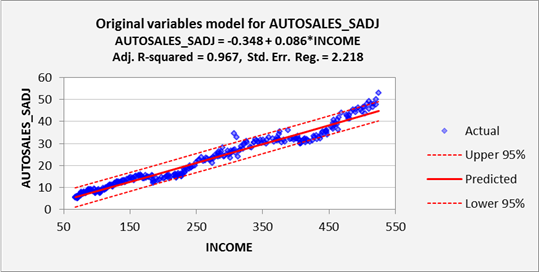

In [13]:
#Make a learning curve
'''
DISCLAIMER:

Following code was done with the help of the following website:
https://www.projectpro.io/recipes/plot-learning-curve-in-python

Code was used to create a learning curve to check whether the model was overfit or underfit. 
All credit goes to original writer of the code.
'''
train_sizes, train_scores, test_scores = learning_curve(neighbors.KNeighborsRegressor(), X, y, cv = 10, scoring = 'accuracy', n_jobs = -1, train_sizes = np.linspace(0.01, 1.0, 50))

In [14]:
training_data_mean = np.mean(train_scores, axis = 1)
training_data_mean

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])